In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from matplotlib import font_manager, rc
import warnings
import seaborn as sns

warnings.filterwarnings('ignore')


train_df  = pd.read_csv('dataset/train.csv')


train_df.head()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,1,53,1,2,130,197,1,0,152,0,1.2,0,0,2,1
1,2,52,1,3,152,298,1,1,178,0,1.2,1,0,3,1
2,3,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0
3,4,45,0,0,138,236,0,0,152,1,0.2,1,0,2,1
4,5,35,1,1,122,192,0,1,174,0,0.0,2,0,2,1


In [2]:
train_df.isnull().sum()

id          0
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [3]:
train_df.describe()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,76.000000,54.496689,0.682119,1.066225,132.033113,244.529801,0.158940,0.509934,150.629139,0.324503,0.976821,1.377483,0.602649,2.317881,0.549669
std,43.734045,8.904586,0.467202,1.056213,17.909929,56.332206,0.366837,0.514685,23.466463,0.469747,1.085998,0.640226,0.917093,0.604107,0.499183
min,1.000000,34.000000,0.000000,0.000000,94.000000,131.000000,0.000000,0.000000,88.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,38.500000,48.500000,0.000000,0.000000,120.000000,208.000000,0.000000,0.000000,136.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,76.000000,54.000000,1.000000,1.000000,130.000000,239.000000,0.000000,1.000000,155.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,113.500000,61.000000,1.000000,2.000000,140.000000,270.000000,0.000000,1.000000,168.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,151.000000,77.000000,1.000000,3.000000,192.000000,564.000000,1.000000,2.000000,195.000000,1.000000,5.600000,2.000000,3.000000,3.000000,1.000000


In [4]:
# len(train_df.columns)
for i in range(1, len(train_df.columns)):
    print(train_df.columns[i], ':', train_df.iloc[:,i].max(),'-', train_df.iloc[:,i].min())

age : 77 - 34
sex : 1 - 0
cp : 3 - 0
trestbps : 192 - 94
chol : 564 - 131
fbs : 1 - 0
restecg : 2 - 0
thalach : 195 - 88
exang : 1 - 0
oldpeak : 5.6 - 0.0
slope : 2 - 0
ca : 3 - 0
thal : 3 - 0
target : 1 - 0


<AxesSubplot:>

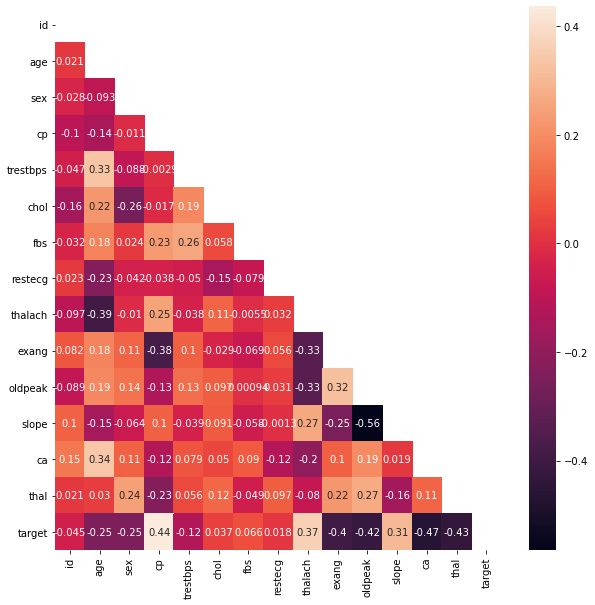

In [5]:
mask = np.zeros_like(train_df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(10, 10))
sns.heatmap(train_df.corr(), annot=True, mask=mask)

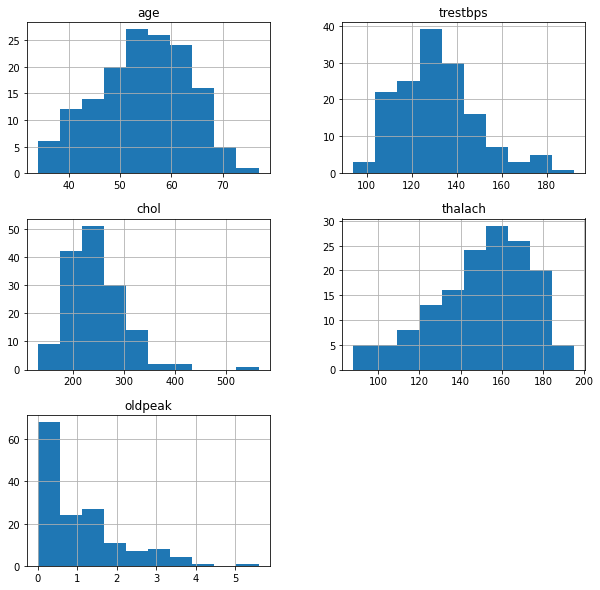

In [6]:
train_df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']].hist(figsize=(10, 10))
plt.show()

<AxesSubplot:>

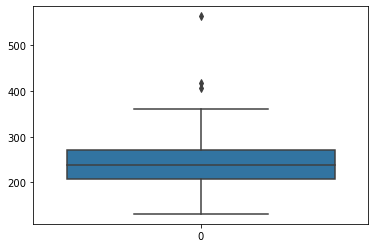

In [7]:
sns.boxplot(data=train_df['chol'])

In [8]:
IQR = train_df['chol'].quantile(q=0.75) - train_df['chol'].quantile(q=0.25)
outlier = train_df.loc[train_df['chol'] > train_df['chol'].quantile(q=0.75) + 1.5 * IQR, :]
display(outlier)

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
11,12,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
16,17,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
100,101,63,0,0,150,407,0,0,154,0,4.0,1,3,3,0


In [9]:
lst_chol = outlier.index.to_list()
lst_chol

[11, 16, 100]

<AxesSubplot:>

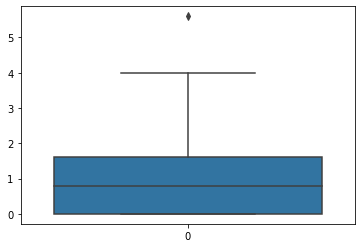

In [10]:
sns.boxplot(data=train_df['oldpeak'])

In [11]:
IQR = train_df['oldpeak'].quantile(q=0.75) - train_df['oldpeak'].quantile(q=0.25)
outlier = train_df.loc[train_df['oldpeak'] > train_df['oldpeak'].quantile(q=0.75) + 1.5 * IQR, :]
display(outlier)

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
8,9,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0


In [12]:
lst_chol = outlier.index.to_list()
lst_chol

[8]

In [13]:
train_df[(train_df['thal'] == 0) | (train_df['ca'] == 4)]

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
129,130,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1


In [14]:
train_df.shape

(151, 15)

In [15]:
train_df.drop([129], inplace=True)

In [16]:
train_df.drop(lst_chol, axis=0, inplace=True)

<AxesSubplot:>

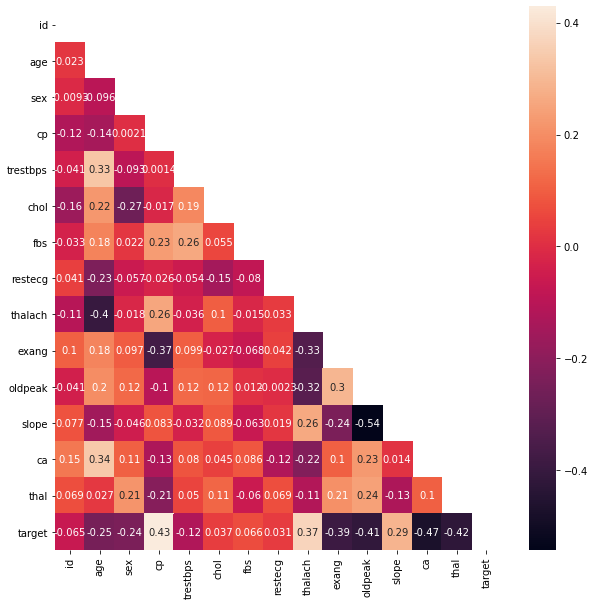

In [17]:
mask = np.zeros_like(train_df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(10, 10))
sns.heatmap(train_df.corr(), annot=True, mask=mask)

In [18]:
X = train_df[train_df.columns[1:-1]]
y = train_df[['target']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [19]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

In [20]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=42)
model.fit(X_scaled_train, y_train)
print(model.score(X_scaled_train, y_train))

0.9099099099099099


In [21]:
from sklearn.metrics import classification_report

pred_test = model.predict(X_scaled_test)
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.80      0.71      0.75        17
           1       0.78      0.86      0.82        21

    accuracy                           0.79        38
   macro avg       0.79      0.78      0.78        38
weighted avg       0.79      0.79      0.79        38

